<a href="https://colab.research.google.com/github/j28302830/Senior_Project/blob/main/detection/LSTM_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import preprocessing
import numpy as np 
from keras.models import Sequential
from keras.layers import Input, Dense, LSTM
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('/content/merge_labeled_detect.csv')

#### label coding for nominal values
def label_coding(label):
    dataset[label]= label_encoder.fit_transform(dataset[label]) 
    dataset[label].unique()
    
### label encoding
label_encoder = preprocessing.LabelEncoder() 
label_coding('Flow ID')
label_coding('Src IP')
label_coding('Dst IP')
label_coding('Timestamp')
label_coding('Label')

### extracting features
X=dataset.iloc[:,:-1]
X=X.values

print("+-inf",sum(np.isinf(X)))
print("inf",sum(np.isposinf(X)))
print("-inf",sum(np.isneginf(X)))
print("nan",sum(np.isnan(X)))
print("fin",sum(np.isfinite(X)))

X = np.where(np.isnan(X), 0, X)
X = np.where(np.isposinf(X), 0, X)
X = np.where(np.isneginf(X), 0, X)

scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Y = dataset['Label'].values

+-inf [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 13  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0]
inf [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 13  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0]
-inf [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
nan [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0]
fin [41505 41505 41505 41505 41505 41505 41505 41

In [ ]:
X1 = np.reshape(X, (X.shape[0], 83, 1))
print(X1.shape)

(41505, 83, 1)


In [ ]:
model = Sequential()
InputLayer = Input( batch_input_shape=(None, 83, 1), name="lstm_input", dtype=tf.float32, sparse=False, ragged=False)
model.add(InputLayer)
model.add(LSTM(64, batch_input_shape=(None, 83, 1), name="lstm", dtype=tf.float32, return_sequences=True))
model.add(LSTM(1, name="lstm_1", dtype=tf.float32, activation="sigmoid"))
model.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 83, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 1)                 264       
                                                                 
Total params: 17,160
Trainable params: 17,160
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.3, random_state=123)
history = model.fit(X_train, Y_train, epochs=100, validation_split=0.05)

Epoch 1/100
863/863 [==============================] - 74s 79ms/step - loss: 0.0090 - acc: 1.0000 - val_loss: 1.1240e-05 - val_acc: 1.0000
Epoch 2/100
863/863 [==============================] - 58s 67ms/step - loss: 7.0216e-06 - acc: 1.0000 - val_loss: 4.4080e-06 - val_acc: 1.0000
Epoch 3/100
863/863 [==============================] - 56s 65ms/step - loss: 3.1695e-06 - acc: 1.0000 - val_loss: 2.2431e-06 - val_acc: 1.0000
Epoch 4/100
863/863 [==============================] - 56s 65ms/step - loss: 1.7035e-06 - acc: 1.0000 - val_loss: 1.2645e-06 - val_acc: 1.0000
Epoch 5/100
863/863 [==============================] - 57s 66ms/step - loss: 9.7430e-07 - acc: 1.0000 - val_loss: 7.2289e-07 - val_acc: 1.0000
Epoch 6/100
863/863 [==============================] - 56s 65ms/step - loss: 5.6361e-07 - acc: 1.0000 - val_loss: 4.2072e-07 - val_acc: 1.0000
Epoch 7/100
863/863 [==============================] - 56s 65ms/step - loss: 3.1710e-07 - acc: 1.0000 - val_loss: 2.3850e-07 - val_acc: 1.0000
Epo

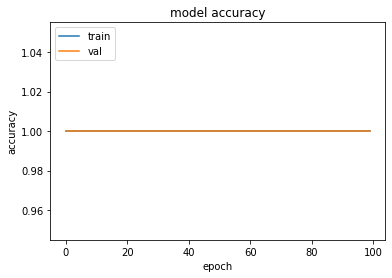

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

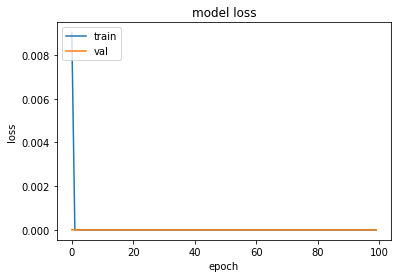

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
loss , accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.5f%%, Loss %f' % (100*accuracy, loss))

390/390 [==============================] - 7s 17ms/step - loss: 0.0000e+00 - acc: 1.0000
Accuracy: 100.00000%, Loss 0.000000


In [ ]:
y_pred = model.predict(X_test)
y_true = np.reshape(Y_test, (Y_test.size, 1))
y_pred[y_pred >= 0.99] = 1
y_pred[y_pred < 0.99] = 0
print(y_true.shape)
print(y_pred.shape)

(12452, 1)
(12452, 1)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12452

    accuracy                           1.00     12452
   macro avg       1.00      1.00      1.00     12452
weighted avg       1.00      1.00      1.00     12452



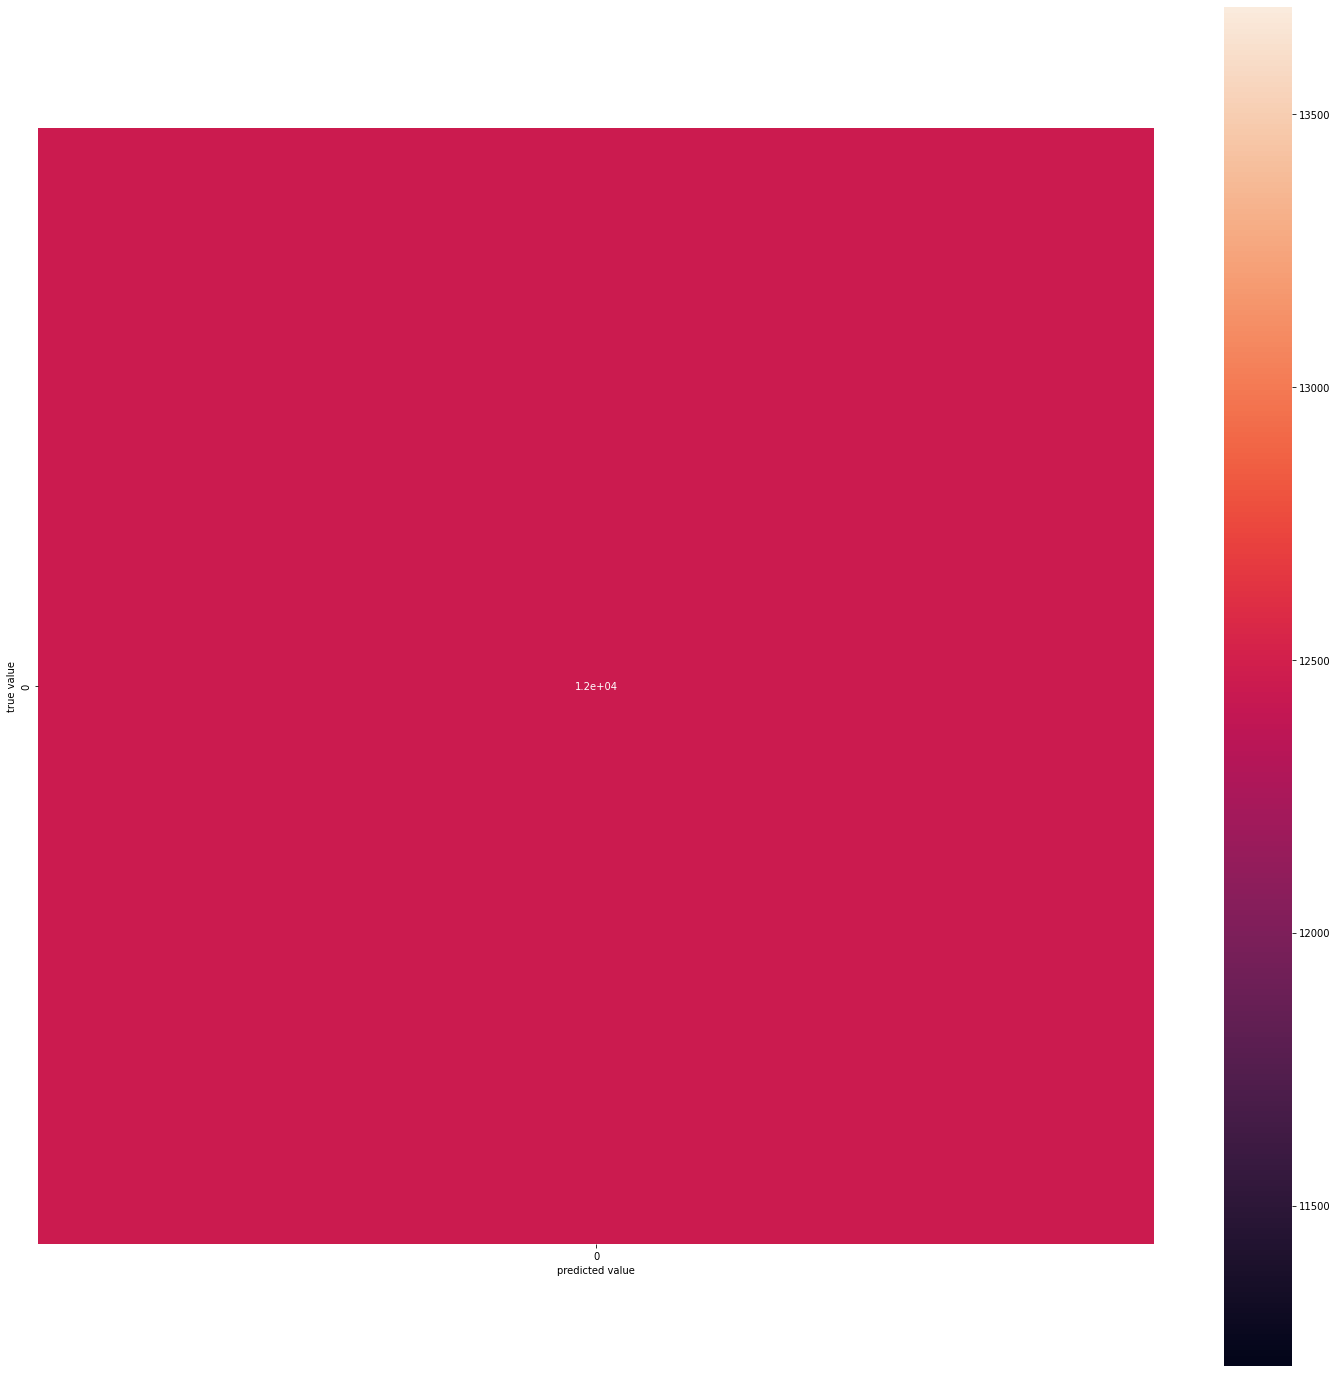

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(25, 25))
mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat,square= True, annot=True, cbar= True, ax=ax)
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()